Install Libraries

In [ ]:
!pip install pandas numpy scikit-learn matplotlib prophet


Load Dataset

In [ ]:
from google.colab import files
import pandas as pd
import io

# Upload file from your device
uploaded = files.upload()

# Get the filename (first uploaded file)
filename = list(uploaded.keys())[0]

# Read the CSV file
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Display first few rows
df.head()

Saving supply_chain_data.csv to supply_chain_data.csv


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


Preprocess Data

In [ ]:
import pandas as pd

# Create a dummy 'ds' (datestamp) column as no explicit date column was found.
# This assigns a sequence of dates starting from an arbitrary point.
# Please replace this with your actual date column if available.
df['ds'] = pd.to_datetime(pd.date_range(start='2023-01-01', periods=len(df), freq='D'))

# Assuming 'Number of products sold' as the 'y' (value) column for demand forecasting.
# Please adjust this if you intend to forecast a different metric.
df['y'] = df['Number of products sold']

# Select only the 'ds' and 'y' columns for Prophet
df_prophet = df[['ds', 'y']]

print("DataFrame prepared for Prophet with dummy 'ds' and 'y' from 'Number of products sold'.")
display(df_prophet.head())

DataFrame prepared for Prophet with dummy 'ds' and 'y' from 'Number of products sold'.


,ds,y
0,2023-01-01,802
1,2023-01-02,736
2,2023-01-03,8
3,2023-01-04,83
4,2023-01-05,871


Demand Forecasting Model (Prophet)

In [ ]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
125,2023-05-06,327.691066,-35.487225,737.783888
126,2023-05-07,423.987916,44.233538,781.599357
127,2023-05-08,484.842680,111.047817,830.468134
128,2023-05-09,435.903891,41.300387,809.347697
129,2023-05-10,453.891069,78.809261,833.825051


Plot:

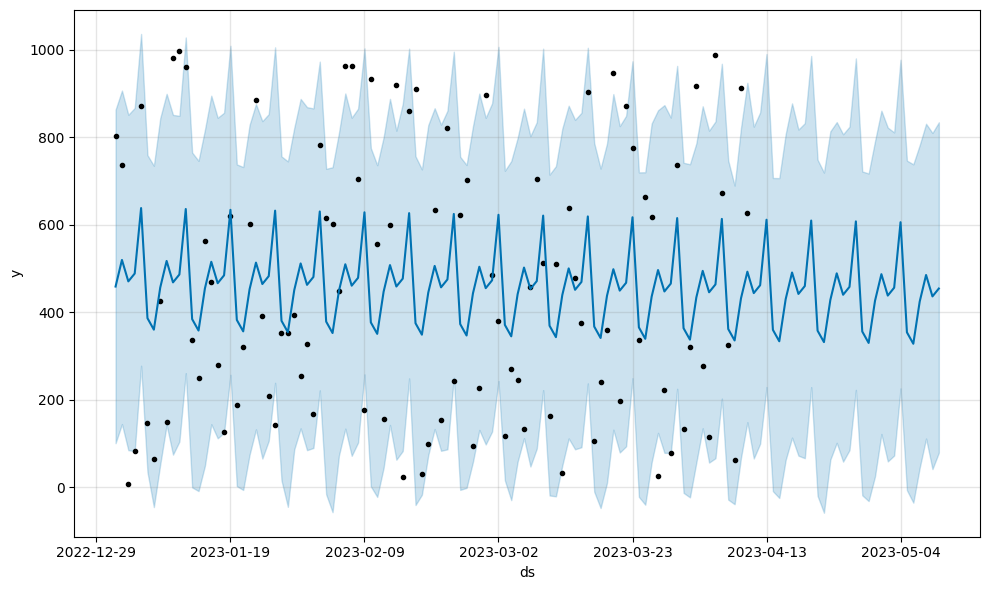

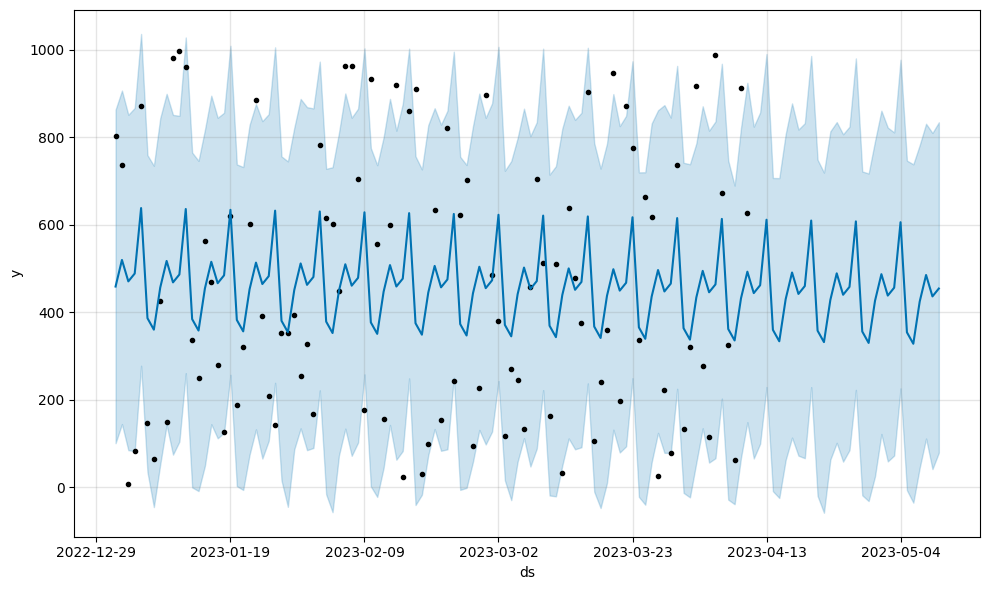

In [ ]:
model.plot(forecast)


Inventory Optimization (Economic Order Quantity – EOQ)

In [ ]:
import numpy as np

annual_demand = df['y'].sum()
ordering_cost = 50
holding_cost = 2

EOQ = np.sqrt((2 * annual_demand * ordering_cost) / holding_cost)
EOQ


np.float64(1518.2061783565498)

Reorder Point (ROP):

In [ ]:
lead_time = 7
avg_daily_demand = df['y'].mean()

ROP = avg_daily_demand * lead_time
ROP


np.float64(3226.9300000000003)

Output for Agent Workflow

In [ ]:
output = {
    "forecast_next_30_days": forecast[['ds','yhat']].tail(30).to_dict(),
    "EOQ": EOQ,
    "Reorder_Point": ROP
}

output


{'forecast_next_30_days': {'ds': {100: Timestamp('2023-04-11 00:00:00'),
   101: Timestamp('2023-04-12 00:00:00'),
   102: Timestamp('2023-04-13 00:00:00'),
   103: Timestamp('2023-04-14 00:00:00'),
   104: Timestamp('2023-04-15 00:00:00'),
   105: Timestamp('2023-04-16 00:00:00'),
   106: Timestamp('2023-04-17 00:00:00'),
   107: Timestamp('2023-04-18 00:00:00'),
   108: Timestamp('2023-04-19 00:00:00'),
   109: Timestamp('2023-04-20 00:00:00'),
   110: Timestamp('2023-04-21 00:00:00'),
   111: Timestamp('2023-04-22 00:00:00'),
   112: Timestamp('2023-04-23 00:00:00'),
   113: Timestamp('2023-04-24 00:00:00'),
   114: Timestamp('2023-04-25 00:00:00'),
   115: Timestamp('2023-04-26 00:00:00'),
   116: Timestamp('2023-04-27 00:00:00'),
   117: Timestamp('2023-04-28 00:00:00'),
   118: Timestamp('2023-04-29 00:00:00'),
   119: Timestamp('2023-04-30 00:00:00'),
   120: Timestamp('2023-05-01 00:00:00'),
   121: Timestamp('2023-05-02 00:00:00'),
   122: Timestamp('2023-05-03 00:00:00'),
   